In [69]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

In this question we were asked to estimate the value of $\pi$ and $e$.

In [91]:
npts = [50, 100, 500, 1000, 5000, 10000, 50000, 100000]

In [92]:
def sq_and_triangle(POINTS):
    np.random.seed(42)
    #square
    X, Y = np.random.uniform(low = -1.0, high=1.0, size =POINTS), np.random.uniform(low = -1.0, high=1.0, size = 
                                                                               POINTS)
    idx = np.sqrt(X**2 + Y**2) <= 1
    idxneg = ~idx
    piest_sq =4 * idx.sum()/len(X)
    plt.figure(1)
    plt.plot(X[idx], Y[idx], 'ob')
    plt.plot(X[idxneg], Y[idxneg], 'or')
    plt.savefig('Image-Q1/square-pi-' + str(POINTS) + '.png')
    
    #triangle
    a = (0, 2)
    b = (-np.sqrt(3), -1)
    c = (np.sqrt(3), -1)
    
    p = np.random.uniform(low = 0.0, high = 1.0,size = POINTS)
    q = np.random.uniform(low = 0.0, high = 1.0, size = POINTS)
    
    alpha1 = np.minimum(p, q)
    alpha2 = np.maximum(p, q)
    
    X = a[0]*alpha1 + b[0]*(alpha2-alpha1)  + c[0]*(1-alpha2)
    Y = a[1]*alpha1 + b[1]*(alpha2-alpha1)  + c[1]*(1-alpha2)
    
    idx = np.sqrt(X**2 + Y**2) <= 1
    idxneg = ~idx
    
    piest_tr = 3* np.sqrt(3)* idx.sum() / POINTS
    plt.figure(2)
    plt.plot(X[idx], Y[idx], 'ob')
    plt.plot(X[idxneg], Y[idxneg], 'or')
    plt.savefig('Image-Q1/triangle-pi-' + str(POINTS) + '.png')
    return piest_sq, piest_tr

The estimation of pi for square and triangle is [3.04    3.28    3.096   3.096   3.1336  3.1348  3.14672 3.14412] [2.80592231 3.37749907 3.08651454 3.13327991 3.13120145 3.1670549
 3.14616637 3.13800841] [50, 100, 500, 1000, 5000, 10000, 50000, 100000]


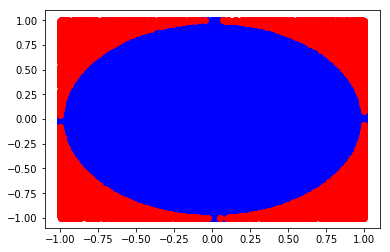

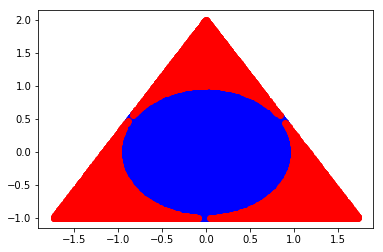

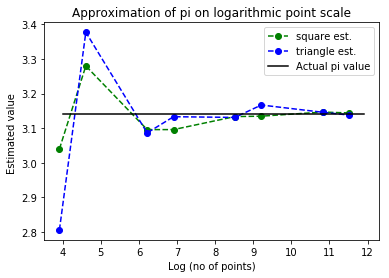

In [93]:
sq_est = np.zeros(len(npts))
tr_est = np.zeros(len(npts))
axis = np.arange(4, 12, 0.1)
actual = np.zeros(len(axis)) +  3.1415926535
i = 0
for n in npts:
    sq_est[i], tr_est[i] = sq_and_triangle(n)
    i = i+1

print('The estimation of pi for square and triangle is', sq_est, tr_est, npts)

plt.figure(3)
plt.plot(np.log(npts), sq_est, 'og--', label = 'square est.')
plt.plot(np.log(npts), tr_est, 'ob--', label = 'triangle est.')
plt.plot(axis, actual, '-k', label = 'Actual pi value')
plt.legend()
plt.xlabel('Log (no of points)')
plt.ylabel('Estimated value ')
plt.title('Approximation of pi on logarithmic point scale')
plt.savefig('Image-Q1/pi-estimation.png')

In [ ]:
POINTS

## 1.1 Estimation of $\pi$

## Estimation of $e$

----
References: https://en.wikipedia.org/wiki/E_(mathematical_constant)

----

1. Using Numerical Approximations
2. Using Monte Carlo Methods

### Numerical Methods

1. Using formula $\sum_{n=1}^{\infty} \frac{1}{n!}$
2. Using formula $ \frac{1}{e}= lim_{n \to \infty} \left( 1 - \frac{1}{n}\right)^n$
3. Using sterling formula $ lim_{n\to \infty} = \frac{n}{\sqrt[n]{n!}}$

#### Using 1

In [101]:
#function for computing factorial upto the maximum of the list
def fac(itera):
    maxa =  max(itera) #maxa is the maximum of the list
    fact = np.zeros(maxa)
    fact[0] = 1
    for i in range(maxa-1):
        fact[i+1] = (i+1)*fact[i]
    return fact

In [102]:
itera = [1, 2, 4, 8, 16, 32, 64] #itera list denotes the number of iterations

#computing the factorial
fact = fac(itera)
#array for storing the values of e, for plotting graph of iteration vs values
val = np.zeros(len(itera))
idx = 0

ans = 0
for i in range(max(itera) ):
    ans = ans + 1.0/fact[i]
    if (i or (i+1)) in itera:
        val[idx] = ans
        idx = idx + 1

In [103]:
print("The approximated values of e after iterations", itera, " are ", val)

The approximated values of e after iterations [1, 2, 4, 8, 16, 32, 64]  are  [1.         2.         2.5        2.70833333 2.71827877 2.71828183
 2.71828183]


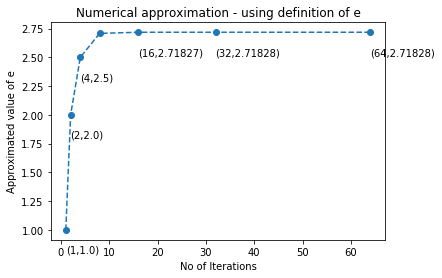

In [104]:
plt.plot(itera, val, 'o--')
plt.xlabel('No of Iterations')
plt.ylabel('Approximated value of e')
plt.title('Numerical approximation - using definition of e')
for i in range(len(itera)):
    if i != 3:
        plt.text(itera[i], val[i]-0.20, '(' + str(itera[i])  + ',' +  str(val[i])[0:7]+')')

plt.savefig('Image-Q1/e-approximation-1.png')

#### using 2

In [105]:
itera = [ 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024] #itera list denotes the number itself
ans = np.zeros(len(itera))

for itr, idx in  zip( itera, range(len(itera)) ):
    ans[idx] = 1.0 / ((1.0 - 1.0/itr)**itr)

In [106]:
print("The approximated values of e after iterations", itera, " are ", ans)

The approximated values of e after iterations [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]  are  [4.         3.16049383 2.91028537 2.80840397 2.76200909 2.73982718
 2.72897673 2.72361005 2.72094116 2.7196103 ]


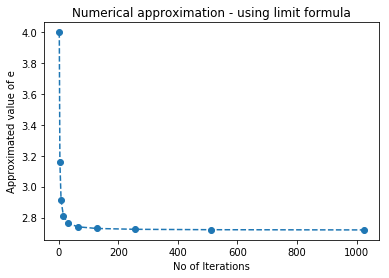

In [107]:
plt.plot(itera, ans, 'o--')
plt.xlabel('No of Iterations')
plt.ylabel('Approximated value of e')
plt.title('Numerical approximation - using limit formula')
plt.savefig('Image-Q1/e-approximation-2.png')

#### Using 3

In [108]:
itera = [ 2, 4, 8, 16, 32, 64, 128] #itera list denotes the number of iterations

#computing the factorial
fact = fac(itera)
#array for storing the values of e, for plotting graph of iteration vs values
ans = np.zeros(len(itera))

for itr, idx in zip(itera, range(len(itera))):
    ans[idx] = itr/(fact[itr -1])**(1.0/itr)

In [109]:
print("The approximated values of e after iterations", itera, " are ", ans)

The approximated values of e after iterations [2, 4, 8, 16, 32, 64, 128]  are  [2.         2.55577242 2.75604415 2.79794232 2.78808203 2.76796534
 2.75046214]


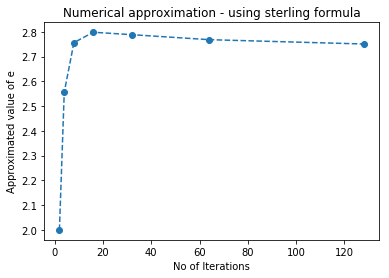

In [110]:
plt.plot(itera, ans, 'o--')
plt.xlabel('No of Iterations')
plt.ylabel('Approximated value of e')
plt.title('Numerical approximation - using sterling formula')
plt.savefig('Image-Q1/e-approximation-3.png')

## Stochastic Approximations

### Method 1: Using exponential distributions

In [143]:
nls = [10, 100, 1000, 10000, 100000,  1000000, 10000000]
estimate = np.zeros(len(nls))

In [144]:
def generating_exp(lamb, NPOINTS):
    np.random.seed(42)
    u = np.random.uniform(low = 0.0, high = 1.0, size = NPOINTS)
    return -np.log(u)/lamb

In [145]:
i = 0
for n in nls:
    X = generating_exp(1, n)
    Y = X >=1
    estimate[i] = 1.0 / Y.mean()
    i = i+1

In [146]:
x = np.arange(1, 7, 0.01)
y = np.zeros(len(x)) + 2.718281828459

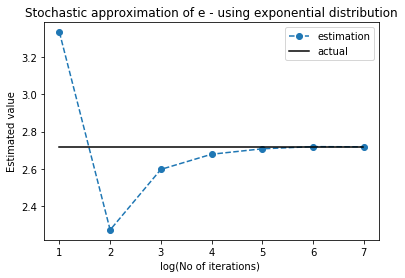

In [147]:
plt.figure()
plt.plot(np.log10(nls), estimate, 'o--', label = 'estimation' )
plt.plot(x, y, 'k-', label = 'actual')
plt.legend()
plt.xlabel('log(No of iterations) ')
plt.ylabel('Estimated value')
plt.title('Stochastic approximation of e - using exponential distribution')
plt.savefig('Image-Q1/stochastic-e-1.png')

In [148]:
estimate

array([3.33333333, 2.27272727, 2.5974026 , 2.67881061, 2.70797227,
       2.71958619, 2.71850678])

### Method 2: Direct Estimation

In [157]:
nls = [10, 100, 1000, 10000, 100000,  1000000]
estimate = np.zeros(len(nls))

In [160]:
estidx = 0
for n in nls:
    T = np.zeros(n)
    for i in range(n):
        summ = 0
        count = 0
        while True:
            summ = summ + np.random.uniform(low = 0.0, high= 1.0, size = 1)
            count = count +1
            if summ > 1:
                T[i] = count
                break
                
    estimate[estidx]  = T.mean()
    estidx = estidx + 1

In [161]:
x = np.arange(1, 6, 0.01)
y = np.zeros(len(x)) + 2.718281828459

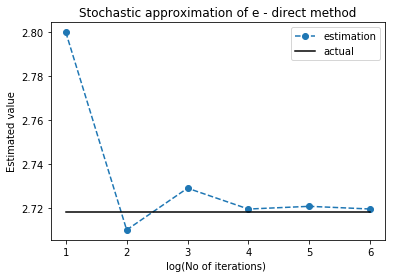

In [162]:
plt.figure()
plt.plot(np.log10(nls), estimate, 'o--', label = 'estimation' )
plt.plot(x, y, 'k-', label = 'actual')
plt.legend()
plt.xlabel('log(No of iterations) ')
plt.ylabel('Estimated value')
plt.title('Stochastic approximation of e - direct method')
plt.savefig('Image-Q1/stochastic-e-2.png')

### Monte-Carlo Integral estimation

In [174]:
nls = [10, 100, 1000, 10000, 100000,  1000000, 10000000]
estimate = np.zeros(len(nls))

In [175]:
estidx = 0
for n in nls:
    X = np.random.uniform(low = 1.0, high = 2.0, size = n)
    hX = 1.0/X
    estimate[estidx] = 2**(1.0/hX.mean())
    estidx = estidx + 1

In [176]:
estimate

array([2.61328166, 2.73311734, 2.72263031, 2.73503453, 2.71676695,
       2.71847457, 2.7182204 ])

In [177]:
x = np.arange(1, 7, 0.01)
y = np.zeros(len(x)) + 2.718281828459

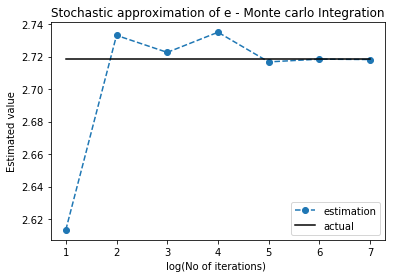

In [178]:
plt.figure()
plt.plot(np.log10(nls), estimate, 'o--', label = 'estimation' )
plt.plot(x, y, 'k-', label = 'actual')
plt.legend()
plt.xlabel('log(No of iterations) ')
plt.ylabel('Estimated value')
plt.title('Stochastic approximation of e - Monte carlo Integration')
plt.savefig('Image-Q1/stochastic-e-3.png')